In [107]:
import tensorflow as tf
import keras as keras
from keras.layers import *
from keras.models import *
from keras.optimizers import *

import pandas as pd
import cv2

from matplotlib import pyplot as plt

import sklearn

In [108]:
train_df = pd.read_csv("../../data/actor_age/train/train.csv")
test_df = pd.read_csv("../../data/actor_age/test/test.csv")

In [109]:
train_df.dtypes

ID       object
Class    object
dtype: object

In [110]:
# train_df = train_df.iloc[:10000]
train_df.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [111]:
test_df.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [112]:
img_width = 32
img_height = 32
def get_img(img_id, phase="train"):
    # Load as grayscale
    img_path = '../../data/actor_age/'+ phase +'/images/' + img_id
#     print(img_path)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    # Reduce size
    resized = cv2.resize(img, (img_width, img_height))
    return resized

print(train_df['ID'][0])
img = get_img(train_df['ID'][0])
img.shape

377.jpg


(32, 32, 3)

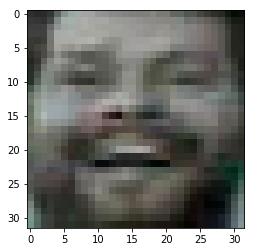

In [113]:
%matplotlib inline
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow('image',img_arr)
plt.imshow(img)

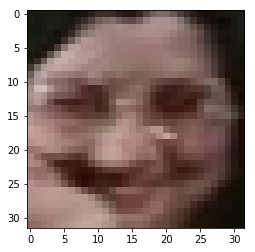

In [114]:
img = get_img(test_df['ID'][0], phase="test")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# cv2.imshow('image',img_arr)
plt.imshow(img)

In [115]:
def generate_input(df, phase):
    X = []
    df['ID'].apply(lambda a: X.append(get_img(a, phase)))
    return X

train_X = np.array(generate_input(train_df, "train"))
test_X = np.array(generate_input(test_df, "test"))
print(train_X.shape)
print(test_X.shape)
# train_X.size

(19906, 32, 32, 3)
(6636, 32, 32, 3)


In [116]:
from sklearn.preprocessing import OneHotEncoder

def generate_output(df):
    dict = { 'YOUNG' : 0, 'MIDDLE': 1, 'OLD': 2 }
    out_Y = []
    df['Class'].apply(lambda a: out_Y.append(dict[a]))
    out_Y = np.array(out_Y)
    # print(train_Y)
    # print(tf.one_hot(train_Y, 3))
    np.array(tf.one_hot(out_Y, 3))
    # print(pd.get_dummies(train_df['Class']))
    one_hot_Encoder = OneHotEncoder(sparse=False)
    out_Y = np.array(one_hot_Encoder.fit_transform(out_Y.reshape((-1, 1))))
    # print(train_Y)
    out_Y.shape
    return out_Y
train_Y = generate_output(train_df)
# test_Y = generate_output(test_df)

In [151]:
nb_filters1 = 64
conv1_size = 3
pool_size = 2

model = Sequential()
model.add(Conv2D(nb_filters1, (conv1_size, conv1_size), padding="same", input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size)))

In [152]:
nb_filter2 = 64
conv2_size = 3

model.add(BatchNormalization(input_shape=(3,32,32)))

model.add(Conv2D(nb_filter2, (conv2_size, conv2_size), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

nb_filter3 = 32
conv3_size = 2

model.add(Conv2D(nb_filter3, (conv3_size, conv3_size), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Conv2D(nb_filter3, (conv3_size, conv3_size), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

In [153]:
num_classes = 3

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [154]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_26 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_27 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)          0         
__________

In [160]:
# opt = SGD(lr=0.01)
model.compile(optimizer="nadam",
              loss='categorical_crossentropy', metrics=['accuracy'])
train_Y.shape

(19906, 3)

In [161]:
model.fit(x=train_X, y=train_Y, epochs=50, validation_split=0.1)

Train on 17915 samples, validate on 1991 samples
Epoch 1/50
17915/17915 [==============================] - 134s 7ms/step - loss: 0.7512 - acc: 0.6761 - val_loss: 0.8208 - val_acc: 0.6655
Epoch 2/50
17915/17915 [==============================] - 136s 8ms/step - loss: 0.7118 - acc: 0.6891 - val_loss: 0.6965 - val_acc: 0.7157
Epoch 3/50
17915/17915 [==============================] - 127s 7ms/step - loss: 0.6841 - acc: 0.7071 - val_loss: 0.7127 - val_acc: 0.7052
Epoch 4/50
17915/17915 [==============================] - 127s 7ms/step - loss: 0.6637 - acc: 0.7177 - val_loss: 0.6955 - val_acc: 0.6961
Epoch 5/50
17915/17915 [==============================] - 125s 7ms/step - loss: 0.6419 - acc: 0.7253 - val_loss: 0.6806 - val_acc: 0.7162
Epoch 6/50
17915/17915 [==============================] - 123s 7ms/step - loss: 0.6314 - acc: 0.7316 - val_loss: 0.7385 - val_acc: 0.6991
Epoch 7/50
17915/17915 [==============================] - 124s 7ms/step - loss: 0.6223 - acc: 0.7389 - val_loss: 0.6674 - v

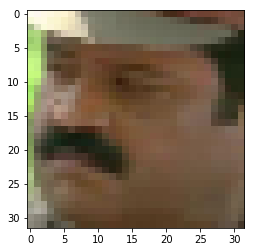

In [162]:
img = cv2.cvtColor(train_X[7000], cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [163]:
prediction = model.predict(train_X[7000:7001])
prediction = prediction.argmax(axis=1)
prediction

array([1])

In [164]:
train_Y[7000:7001].argmax(axis=1)

array([1])

In [165]:
model.evaluate(train_X[:19000], train_Y[:19000])

19000/19000 [==============================] - 53s 3ms/step


[0.3372523833701485, 0.8633157894736843]

In [166]:
test_Y = model.predict(test_X)

In [167]:
test_Y = test_Y.argmax(axis=1)

In [168]:
dict1 = { 'YOUNG' : 0, 'MIDDLE': 1, 'OLD': 2 }
test_C = []
for i in range(test_Y.shape[0]):
    test_C.append(list(dict1.keys())[list(dict1.values()).index(test_Y[i])])
# test_C
test_df['Class'] = test_C

In [169]:
test_df.dtypes

ID       object
Class    object
dtype: object

In [170]:
test_df.to_csv("../../data/actor_age/test_out.csv", columns=["ID", "Class"], index=False)